# Data cleaning

Learn how to effectively clean your data by tackling data discrepancies such as noisy data, missing values, outliers and inconsistencies

There are three levels of data cleaning:

*   **First level-General cleaning steps:** By cleaning up the table in order to have a standard data structure and attributes that have intuitive and codable names and rows that have unique identifiers (already done)
*   **Second level-By Unpacking, restructuriing and reformatting the table**(already done)
*   **Third level-**By Dealing with data errors, missing values, detecting and handling outliers, smoothing data (during this programming lab)



---
> Author: Dr. Fadoua Ouamani


---



In [6]:
import pandas as pd    # to handle the dataframe
pd.set_option('expand_frame_repr', False) #to avoid the multi-lines formatting of the dataframe
import numpy as np     # to handle numbers and ndarray
import matplotlib.pyplot as plt #to visualize the data


In [7]:
tayou_df = pd.read_csv('tayou.csv')

In [8]:
#getting rid of missing values and only keeping numerical attributes
from sklearn.impute import SimpleImputer
num_split=tayou_df.loc[:,tayou_df.dtypes!=object]
tayou_df_centTend = num_split.copy()
const_imputer = SimpleImputer(strategy='most_frequent') # imputing using constant value
tayou_df_centTend.iloc[:,:] = const_imputer.fit_transform(tayou_df_centTend)

### 2. Noise & Outliers

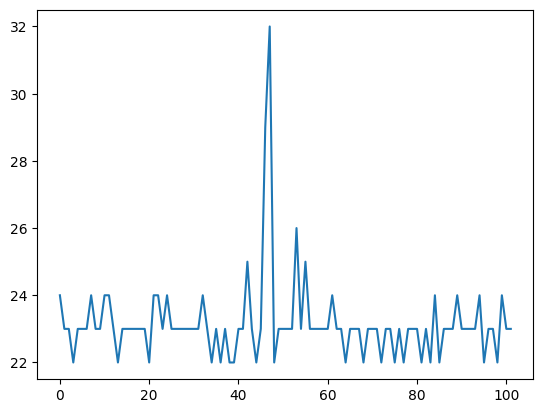

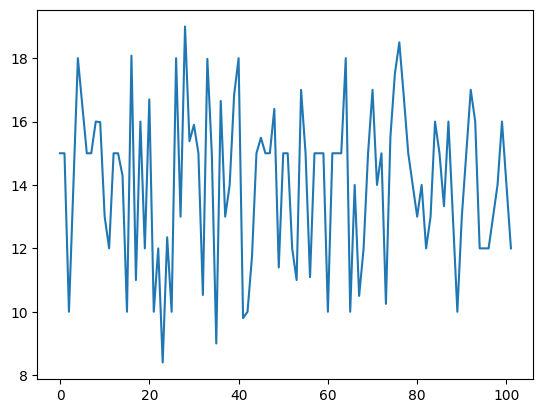

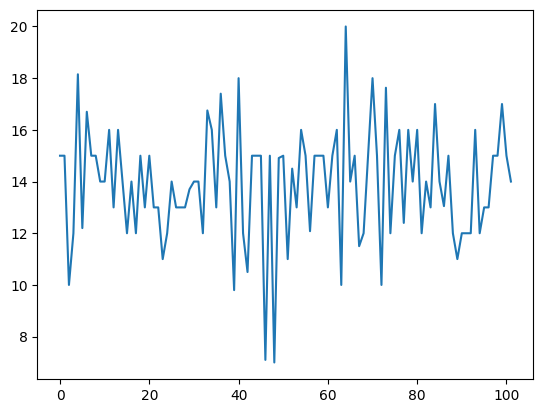

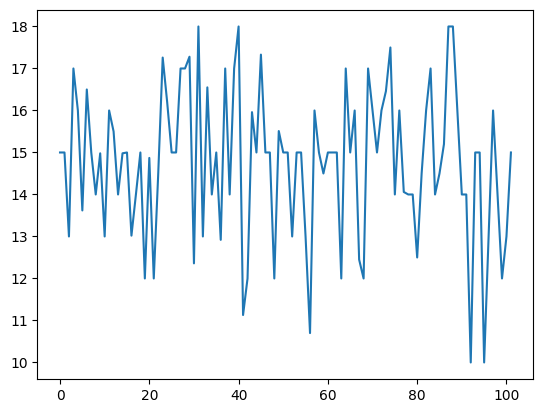

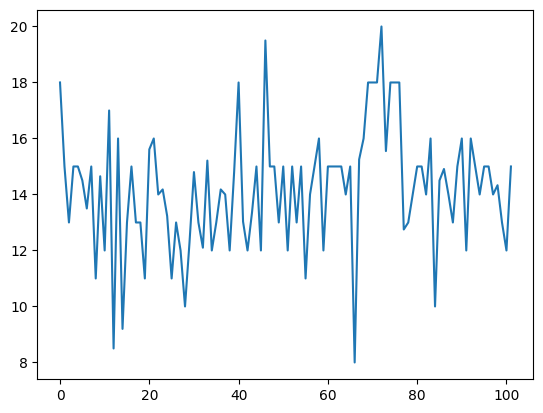

In [9]:
#Visualization of data curves of the numerical attributes
for column in tayou_df_centTend.columns:
  tayou_df_centTend[column].plot()
  plt.show()

<Axes: xlabel='Age', ylabel='GStat'>

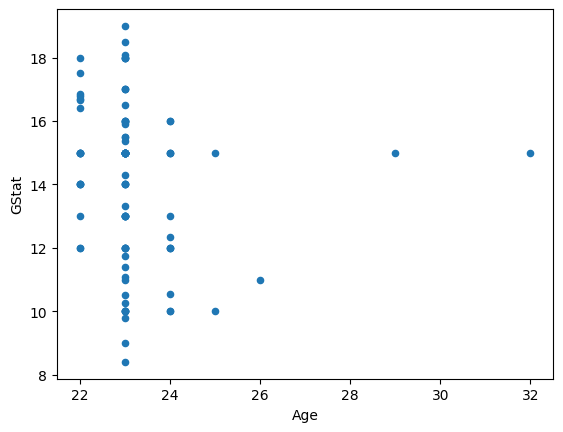

In [10]:
#Visualization with scatter plots
tayou_df_centTend.plot.scatter(x='Age', y='GStat')

**Interpretations:**
Loads a dataset, handles missing values by replacing them with the most frequent value in each column, and focuses on numerical data.
It visualizes the numerical attributes using line plots.
It generates a scatter plot to understand the relationship between age and the statistics grade.
indication de la nature des associations (négative et positive) plus l'indication des outliers/noise.
On peut découvrir des patterns ou s'accumulent les données (leurs regression et prediction (estimation)).

In [11]:
#Visualization
# do the same thing for the other couples of numerical attributes and interpret the resulting scatter plot
.................

SyntaxError: invalid syntax (3355975951.py, line 3)

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='GStat', ylabel='Age'>,
        <Axes: xlabel='GMath', ylabel='Age'>,
        <Axes: xlabel='GOOP', ylabel='Age'>,
        <Axes: xlabel='GEnglish', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='GStat'>,
        <Axes: xlabel='GStat', ylabel='GStat'>,
        <Axes: xlabel='GMath', ylabel='GStat'>,
        <Axes: xlabel='GOOP', ylabel='GStat'>,
        <Axes: xlabel='GEnglish', ylabel='GStat'>],
       [<Axes: xlabel='Age', ylabel='GMath'>,
        <Axes: xlabel='GStat', ylabel='GMath'>,
        <Axes: xlabel='GMath', ylabel='GMath'>,
        <Axes: xlabel='GOOP', ylabel='GMath'>,
        <Axes: xlabel='GEnglish', ylabel='GMath'>],
       [<Axes: xlabel='Age', ylabel='GOOP'>,
        <Axes: xlabel='GStat', ylabel='GOOP'>,
        <Axes: xlabel='GMath', ylabel='GOOP'>,
        <Axes: xlabel='GOOP', ylabel='GOOP'>,
        <Axes: xlabel='GEnglish', ylabel='GOOP'>],
       [<Axes: xlabel='Age', ylabel='GEnglish'>,
  

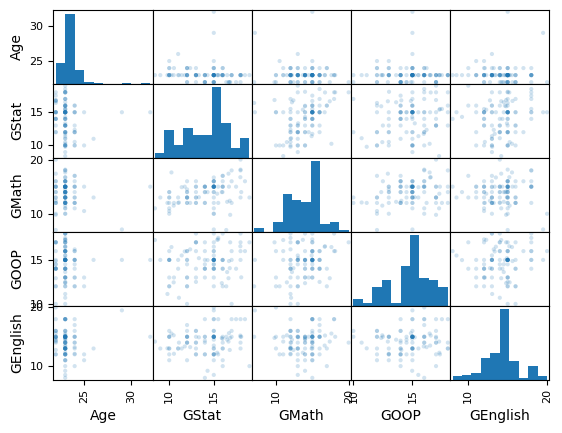

In [12]:
#Visualization of scatter plot for all the columns
pd.plotting.scatter_matrix(tayou_df_centTend, alpha=0.2)

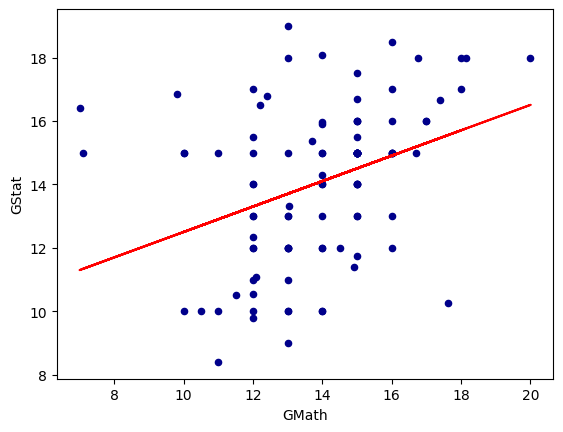

In [13]:
##Visualization with the best fit ("trend" line) for a guided understanding and explanation
#plot the data points
tayou_df_centTend.plot.scatter(x='GMath', y='GStat', color='DarkBlue')
#Fit a line to the data
x=np.array(tayou_df_centTend['GMath'])
y=np.array(tayou_df_centTend['GStat'])
a, b = np.polyfit(x, y, 1) #calculating the slope a and the y_intercept b of the line
plt.plot(x, a*x + b, color='red', label='Line of Best Fit') #a linear regression line

In [ ]:
##Visualization with the best fit ("trend" line) for a guided understanding and explanation
#do the same thing for GMath and GOOP

In [ ]:
##Visualization with the best fit ("trend" line) for a guided understanding and explanation
#do the same thing for GMath and GEnglish


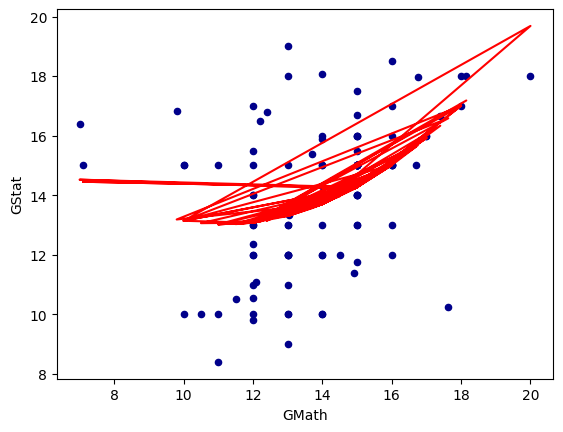

In [14]:
##Visualization with the best fit ("trend" line) for a guided understanding and explanation
#plot the data points
tayou_df_centTend.plot.scatter(x='GMath', y='GStat', color='DarkBlue')
#Fit a line to the data
x=np.array(tayou_df_centTend['GMath'])
y=np.array(tayou_df_centTend['GStat'])

coeffs = np.polyfit(x, y, 2)
p = np.poly1d(coeffs)
plt.plot(x, p(x), color='red', label='Line of Best Fit (Polynomial)')


<Axes: >

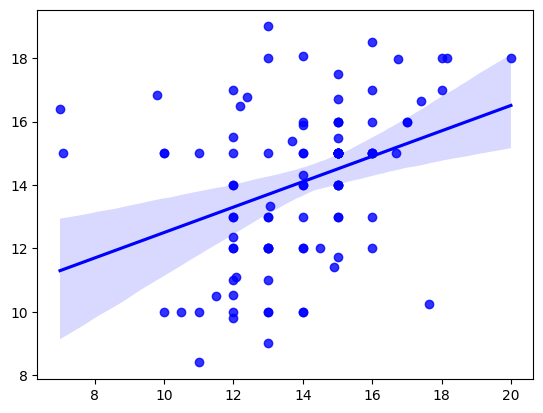

In [15]:
##Visualization with the best fit with Seaborn
import seaborn as sns
x=np.array(tayou_df_centTend['GMath'])
y=np.array(tayou_df_centTend['GStat'])
sns.regplot(x=x, y=y, color='Blue', label='Line of Best Fit')

**Interpretations:**

Smoothing

<Axes: >

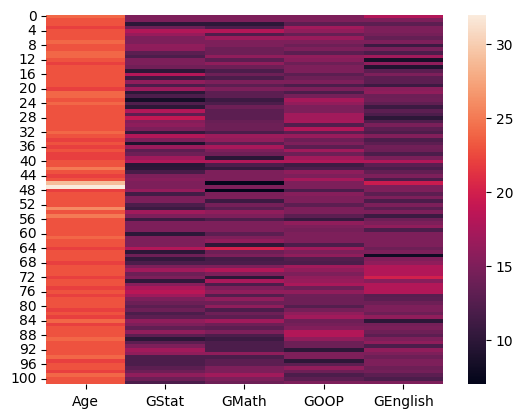

In [16]:
#heatmaps, correlation study and noise
sns.heatmap(tayou_df_centTend)

<Axes: >

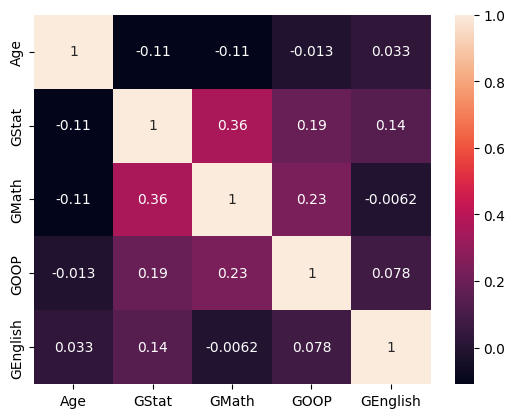

In [17]:
#heatmaps, correlation study and noise
sns.heatmap(tayou_df_centTend.corr(), annot=True)

**Interpretations:**

Scatter plots help visualize the relationship between two variables, whether they exhibit positive, negative, or no correlation.

**1.** Positive Correlation:
If the points in the scatter plot tend to rise diagonally from left to right, it suggests that the two variables have a positive relationship: as one increases, the other tends to increase as well.
Example: If the scatter plot of Age and GOOP (Programming Grades) shows such a pattern, it indicates that older students tend to perform better in programming.

**2.** Negative Correlation:
If the points slope downwards from left to right, it indicates a negative correlation: as one variable increases, the other tends to decrease.
Example: A downward trend between Age and GStat (Statistics Grades) might suggest that older students tend to perform worse in statistics.

**3.** No Correlation:
If the points appear randomly scattered without any discernible pattern, it suggests that the two variables are not correlated.
Example: If Age and GEnglish (English Grades) appear scattered without any clear direction, it suggests that age does not significantly impact English performance.

Bin Edges:  [ 8.4        10.16666667 11.93333333 13.7        15.46666667 17.23333333
 19.        ]
Binned Mean:  [ 9.74545455 10.93875    12.484      14.76228571 16.30263158 18.11777778]
Bin Indices:  [ 0 11  8 20 35 19  9]


(array([ 0., 11.,  0.,  8., 20.,  0., 35.,  0., 19.,  9.]),
 array([ 8.4 ,  9.46, 10.52, 11.58, 12.64, 13.7 , 14.76, 15.82, 16.88,
        17.94, 19.  ]),
 <BarContainer object of 10 artists>)

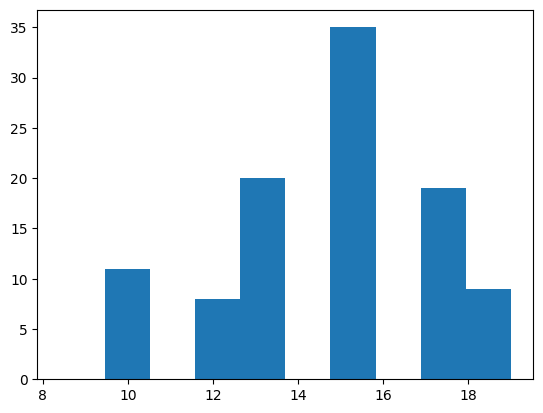

In [18]:
#Smoothing noisy data with binning
#Smoothing by bin mean
import random
import statistics
from scipy.stats import binned_statistic

num_bins = 6
# Use binned_statistic to calculate mean within each bin
result = binned_statistic(tayou_df_centTend['GStat'], tayou_df_centTend['GStat'], bins=num_bins, statistic='mean') #statistic is by default mean, you can choose median to perform smoothing by bin median, or min, max to smooth bin boundaries

# Extract bin edges and binned mean from the result
bin_edges = result.bin_edges
bin_means = result.statistic
bin_indices= result.binnumber
hist=np.bincount(bin_indices)

print('Bin Edges: ', bin_edges)
print('Binned Mean: ', bin_means)
print('Bin Indices: ', hist)

plt.hist(bin_edges, weights=hist)

Bin Edges:  [ 8.4        11.93333333 15.46666667 19.        ]
Histogram Counts:  [19 55 28]


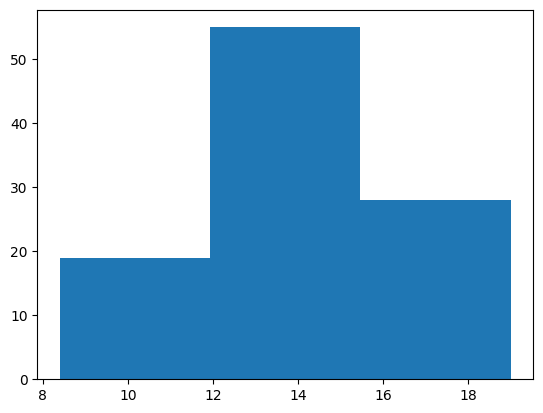

In [19]:
#Smoothing noisy data with bining
#Equal-width Binning
# Define the number of bins
num_bins = 3
# Use numpy's histogram function for equal width bins
hist, bins = np.histogram(tayou_df_centTend['GStat'], bins=num_bins)
print('Bin Edges: ', bins)
print('Histogram Counts: ', hist)
plt.stairs(hist, bins, fill=True)

**Interpretations:**

first section 19 DataPoints

second section 55 DataPoints

Third section 28 DataPoints

Bin Edges:  [ 0.          3.33333333  6.66666667 10.         13.33333333 16.66666667
 20.        ]
Histogram Counts:  [ 0  0  0  3 36 48 15]


(array([ 0.,  0.,  0.,  0.,  0.,  3., 36.,  0., 48., 15.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

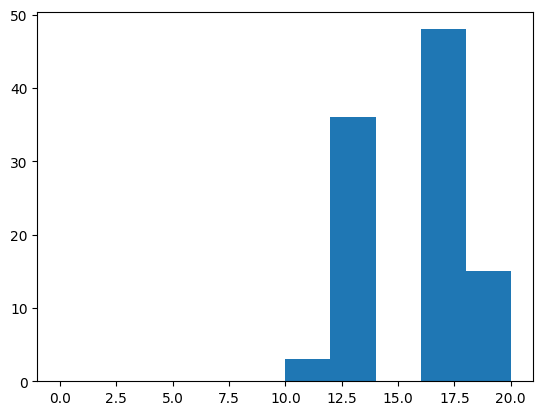

In [20]:
#Smoothing noisy data with bining
#Equal-width Binning
# Define bin edges using linspace
bin_edges = np.linspace(0, 20, 7)  # Create 6 bins from 0 to 20
# Bin the data using digitize
bin_indices = np.digitize(tayou_df_centTend['GStat'], bin_edges)
# Calculate histogram counts using bin count
hist = np.bincount(bin_indices)
print('Bin Edges: ', bin_edges)
print('Histogram Counts: ', hist)
plt.hist(bin_edges, weights=hist)

Bin Edges:  [ 0.  9. 12. 14. 16. 18. 20.]
Histogram Counts:  [ 1 18 20 39 17  7]


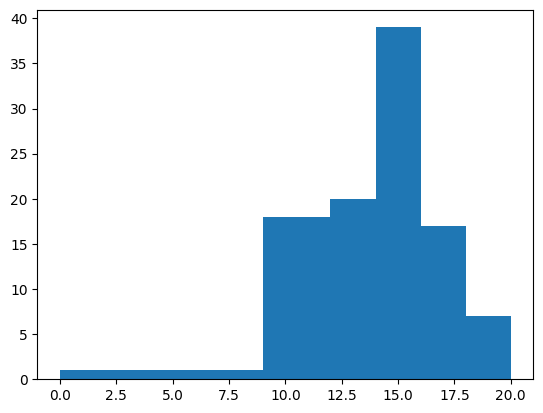

In [21]:
#Set Custom Binning Intervals
# Define custom bin edges
bin_edges = [0, 9., 12., 14., 16., 18., 20.]
# Use numpy's histogram function with custom bins
hist, bins = np.histogram(tayou_df_centTend['GStat'], bins=bin_edges)
print('Bin Edges: ', bins)
print('Histogram Counts: ', hist)
plt.stairs(hist, bins, fill=True)

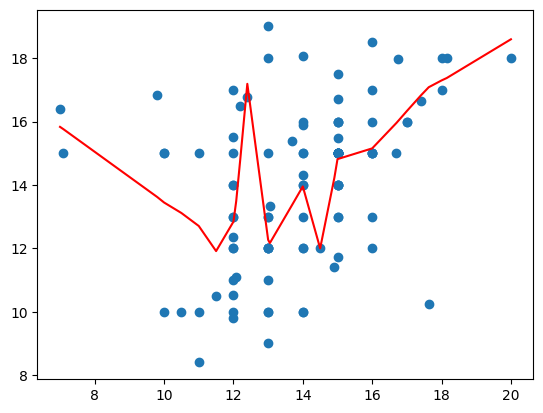

In [23]:
#Smoothing the data with lowess smoothing
import statsmodels.api as sm
x=np.array(tayou_df_centTend['GMath'])
y=np.array(tayou_df_centTend['GStat'])
lowess = sm.nonparametric.lowess(y, x, frac=0.3)
plt.scatter(x, y)
plt.plot(lowess[:, 0], lowess[:, 1], c='r')
plt.show()

**Interpretations:**

un lissage LOWESS (Locally Weighted Scatterplot Smoothing) aux données, qui est une méthode non paramétrique permettant de lisser les relations non linéaires entre deux variables.

Le résultat est une courbe lissée qui aide à visualiser les tendances générales sans être influencée par les fluctuations ponctuelles ou le bruit.

In [24]:
#Smoothing noisy data with clustering
#Importing additional libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Transform the data with Principal components analysis (dimensionality reduction technique) before applying Kmeans
pca = PCA(2) #Only keep two components
df = pca.fit_transform(tayou_df_centTend.loc[:, 'GStat':'GEnglish'])
df.shape

(102, 2)

**Interpretations:**
Ce code applique un lissage aux données bruyantes à l'aide d'une réduction de dimensionnalité et d'un clustering.

Ce processus aide à identifier les motifs principaux dans les données et réduit le bruit avant d'appliquer un clustering, rendant ainsi le clustering plus efficace et interprétable.

In [25]:
#Instanciating kmeans with a given number of clusters
kmeans = KMeans(n_clusters= 3)

#predict the labels of clusters.
label = kmeans.fit_predict(df)

print(label)

[0 0 1 0 0 0 2 0 2 0 2 0 2 0 2 1 0 1 2 1 0 1 1 1 1 1 0 2 2 2 0 2 1 0 2 1 0
 2 2 0 0 1 1 2 0 2 1 0 1 2 0 2 1 1 0 2 1 0 0 2 1 0 0 1 0 1 2 1 1 0 0 0 0 2
 0 0 0 2 2 2 2 1 1 0 2 0 1 0 1 1 1 2 0 0 1 1 1 2 2 2 2 1]


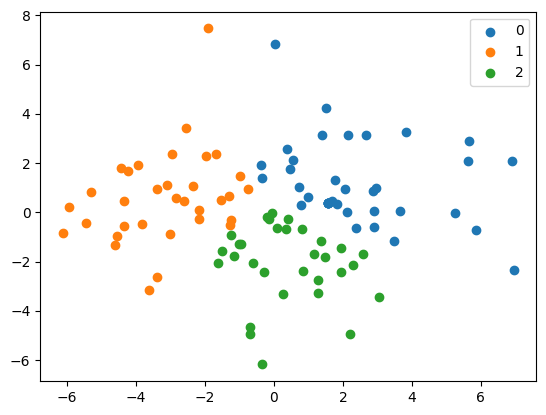

In [26]:
#Plotting the clusters
#Getting unique labels
u_labels = np.unique(label)
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

**Interpretations:**
Le code utilise l'algorithme de K-means pour regrouper les données en trois clusters et visualiser les résultats.

Ce processus permet d'identifier visuellement les groupes naturels dans les données, en révélant ainsi des structures ou motifs similaires entre les observations.


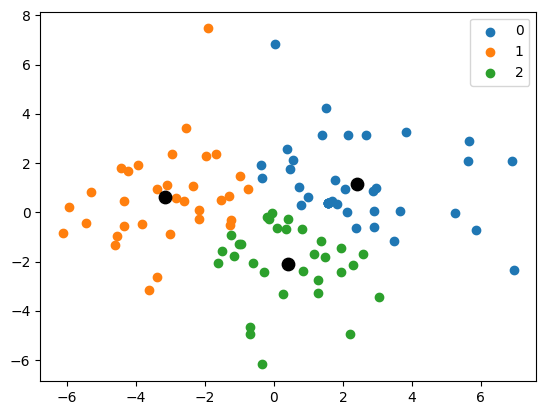

In [27]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

**Exercice:**

1. Compare the techniques used in this programming lab

2. Do you know other techniques for noise and outliers detection, visualization and smoothing?

3. Are they applicable on tayou data?

4. Aplly some of them and interpret the results?